In [182]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
%matplotlib inline
from skimage import data,filters
import scipy.ndimage as ndimage
import numpy as np
from PIL import Image
from math import floor, ceil
import cv2
import os
import math
import pandas as pd
import random
import signal

In [242]:
lego1 = plt.imread("CVassignment3_files/lego1.jpg")
lego2 = plt.imread("CVassignment3_files/lego2.jpg")
height = 9.6
width = 16
length = 32

pts_1 =np.array([[1004,  812],
       [1004,  884],
       [1004,  960],
       [1000, 1032],
       [1004, 1108],
       [1004, 1184],
       [ 996, 1260],
       [1004, 1336],
       [1004, 1408],
       [1004, 1484],
       [1004, 1560],
       [1000, 1632],
       [ 996, 1704],
       [ 996, 1776],
       [ 244, 1448],
       [ 360, 1504],
       [ 476, 1552],
       [ 600, 1608],
       [ 728, 1664],
       [ 860, 1716],
       [1104, 1764],
       [1308, 1728],
       [1508, 1688],
       [1700, 1652],
       [1888, 1616],
       [2072, 1580],
       [2256, 1544],
       [2428, 1512]])


pts_2 = np.array([
    [1568, 770],
    [1568, 856],
    [1576, 948],
    [1568, 1028],
    [1572, 1108],
    [1564, 1196],
    [1568, 1280],
    [1564, 1360],
    [1560, 1440],
    [1556, 1524],
    [1560, 1608],
    [1556, 1684],
    [1560, 1768],
    [1556, 1848],
    [208, 1584],
    [416, 1624],
    [628, 1668],
    [852, 1716],
    [1084, 1752],
    [1316, 1804],
    [1624, 1816],
    [1756, 1744],
    [1884, 1676],
    [2004, 1620],
    [2124, 1556],
    [2232, 1492],
    [2336, 1432],
    [2436, 1380],
])



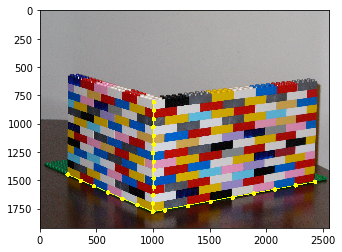

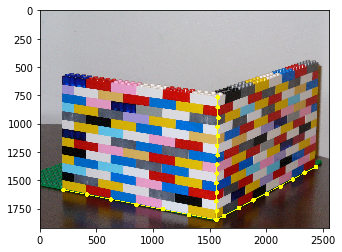

In [241]:
lego1 = plt.imread("CVassignment3_files/lego1.jpg")
lego2 = plt.imread("CVassignment3_files/lego2.jpg")
colour = (255, 255, 0)
for i in range(0, len(pts_2)):
    cv2.circle(lego1,(pts_1[i][0],pts_1[i][1]), 20, colour, thickness=-1)
    cv2.circle(lego2,(pts_2[i][0],pts_2[i][1]), 20, colour, thickness=-1)
    
x = [(996, 1776), (244, 1448)]
y = [(996, 1776),(1004,  812)]
z = [(996, 1776), (2428, 1512)]
cv2.line(lego1, x[0], x[1], colour,5)
cv2.line(lego1, y[0], y[1], colour,5)
cv2.line(lego1, z[0], z[1], colour,5)
x = [(1556, 1848), (1568, 770)]
y = [(1556, 1848),(208, 1584)]
z = [(1556, 1848), (2436, 1380)]
cv2.line(lego2, x[0], x[1], colour,5)
cv2.line(lego2, y[0], y[1], colour,5)
cv2.line(lego2, z[0], z[1], colour,5)

plt.imshow(lego1)
plt.show()
plt.imshow(lego2)
plt.show()


## Plot Lego

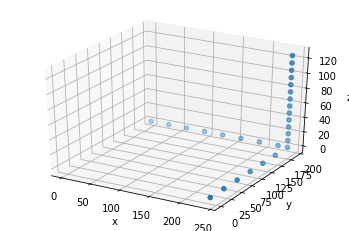

In [240]:
pts_x = [[x*length, 192, 0] for x in range(0,8)]
pts_y = [[240, x*length, 0] for x in range(0,6)]
pts_z = [[240, 192, x*height] for x in range(0,14)]

pts_z.reverse()
pts_x.reverse()
pts = pts_z + pts_y + pts_x
pts = np.asarray(pts)
fig = plt.figure()
ax = fig.add_subplot(projection='3d')
ax.scatter([x[0] for x in pts],[x[1] for x in pts] ,[x[2] for x in pts])
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('z')
plt.show()


# Question 1
## 1a

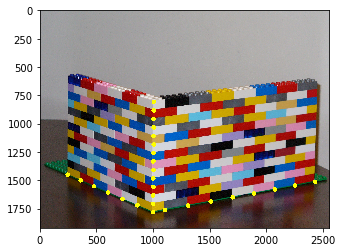

[[-2.82478627e-03  1.53037239e-03  3.55151155e-06  7.89477938e-01]
 [ 1.98822973e-04  3.18710351e-04 -3.16904568e-03  6.13762033e-01]
 [-1.67979269e-07 -2.61737423e-07 -1.31199814e-08  4.96249740e-04]]
[[-5.69226751e+00  3.08387546e+00  7.15670208e-03  1.59088837e+03]
 [ 4.00651038e-01  6.42237820e-01 -6.38598960e+00  1.23680071e+03]
 [-3.38497445e-04 -5.27430852e-04 -2.64382635e-05  1.00000000e+00]]


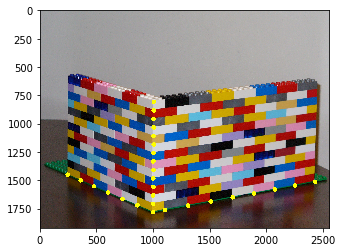

In [269]:
def get_P(x, X):
    # 2d => x, 3d => X    
    A = [] 
    for i in range(0, len(x)):
        yX = x[i][1]*X[i]
        xX = x[i][0]*X[i]
        A.append([0,0,0,0,-X[i][0],-X[i][1],-X[i][2],-1,yX[0],yX[1],yX[2],x[i][1]])
        A.append([X[i][0],X[i][1],X[i][2],1,0,0,0,0,-xX[0],-xX[1],-xX[2],-x[i][0]])
    A = np.asarray(A)
    _,_,V = np.linalg.svd(A)
    p =V.T[:,V.shape[1] - 1]
    P = np.array([
        [p[0],p[1],p[2],p[3]],
        [p[4],p[5],p[6],p[7]],
        [p[8],p[9],p[10],p[11]],
    ])
    return P

def check_P(image, P, points):
    for x in points:
        x = P.dot(np.array([x[0],x[1],x[2],1]))
        cv2.circle(image,(int(x[0]/x[2]),int(x[1]/x[2])), 20, colour, thickness=-1)
    plt.imshow(image)
    plt.show()
        
P = get_P(pts_1, pts)
lego1 = plt.imread("CVassignment3_files/lego1.jpg")
check_P(lego1,P,pts)
print(P)
P = P/P[2,3]
print(P)

lego1 = plt.imread("CVassignment3_files/lego1.jpg")
check_P(lego1,P,pts)


## 1c

In [272]:
def decomposeP(P):
    # The input P is assumed to be a 3−by−4 homogeneous camera matrix.
    # The function returns a homogeneous 3−by−3 calibration matrix K,
    # a 3−by−3 rotation matrix R and a 3−by−1 vector c such that
    # K*R*[eye(3), −c] = P.
    W = np.array([[0,0,1], [0,1,0], [1,0,0]])
    # calculate K and R (up to sign)
    Qt,Rt = np.linalg.qr((W*P[:,0:3]).T)
    K = W*Rt.T*W;
    R = W*Qt.T

    # correct for negative focal length(s) if necessary
    D = np.array([[1,0,0], [0,1,0], [0,0,1]])    
    if K[0,0] < 0:
        D[0,0] = -1
    if K[1,1] < 0: 
        D[1,1] = -1
    if K[2,2] < 0:
        D[2,2] = -1
    K = K*D
    R = D*R

    # calculate c
    c = -R.T*np.linalg.inv(K)*P[:,3]
    return K,R,c
K,R,c = decomposeP(P)


LinAlgError: Singular matrix